In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import np_utils
np.set_printoptions(threshold=np.inf) #show all array
np.random.seed(10)

Using TensorFlow backend.


In [13]:
(x_img_train, y_label_train),\
(x_img_test, y_label_test) = cifar10.load_data()

In [14]:
print("train data:", "image:", x_img_train.shape, "labels", y_label_train.shape)
print("test data:", "image:", x_img_test.shape, "labels", y_label_test.shape)

train data: image: (50000, 32, 32, 3) labels (50000, 1)
test data: image: (10000, 32, 32, 3) labels (10000, 1)


In [15]:
x_img_train_normalize = x_img_train.astype("float32")/255.0
x_img_test_normalize = x_img_test.astype("float32")/255.0

In [16]:
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D

In [75]:
model = Sequential()

In [76]:
model.add(Conv2D(filters = 32,
                kernel_size = (3, 3), 
                input_shape = (32, 32, 3),
                activation = "relu",
                padding = "same"))

In [77]:
model.add(Dropout(0.25))

In [78]:
model.add(MaxPooling2D(pool_size = (2, 2)))

In [79]:
model.add(Conv2D(filters = 64,
                kernel_size = (3, 3), 
                activation = "relu",
                padding = "same"))

In [80]:
model.add(Dropout(0.25))

In [81]:
model.add(MaxPooling2D(pool_size = (2, 2)))

In [82]:
model.add(Flatten())
model.add(Dropout(rate = 0.25))

In [83]:
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(rate = 0.25))

In [84]:
model.add(Dense(10, activation = "softmax"))

In [85]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)              0         
__________

In [86]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", 
             metrics = ["accuracy"])

In [87]:
train_history = model.fit(x = x_img_train_normalize,y = y_label_train_OneHot,
                         validation_split = 0.2,
                         epochs = 10, batch_size = 128, verbose = 1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 75s 2ms/step - loss: 1.5041 - acc: 0.4585 - val_loss: 1.2693 - val_acc: 0.5823
Epoch 2/10
40000/40000 [==============================] - 76s 2ms/step - loss: 1.1376 - acc: 0.5968 - val_loss: 1.1142 - val_acc: 0.6341
Epoch 3/10
40000/40000 [==============================] - 76s 2ms/step - loss: 0.9845 - acc: 0.6542 - val_loss: 1.0031 - val_acc: 0.6654
Epoch 4/10
40000/40000 [==============================] - 75s 2ms/step - loss: 0.8798 - acc: 0.6891 - val_loss: 0.9777 - val_acc: 0.6824
Epoch 5/10
40000/40000 [==============================] - 76s 2ms/step - loss: 0.7884 - acc: 0.7223 - val_loss: 0.8786 - val_acc: 0.7078
Epoch 6/10
40000/40000 [==============================] - 76s 2ms/step - loss: 0.7014 - acc: 0.7539 - val_loss: 0.8559 - val_acc: 0.7128
Epoch 7/10
40000/40000 [==============================] - 76s 2ms/step - loss: 0.6222 - acc: 0.7808 - val_loss: 0.8159 - val_acc

In [88]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel("Epoch")
    plt.legend(["train", "validation"], loc = "upper left")
    plt.show()

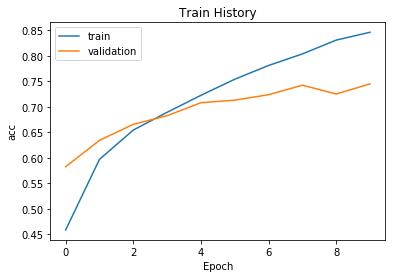

In [89]:
show_train_history(train_history, "acc", "val_acc")

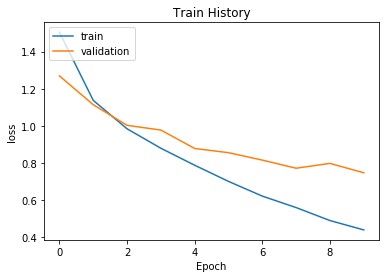

In [90]:
show_train_history(train_history, "loss", "val_loss")

In [91]:
scores = model.evaluate(x = x_img_train_normalize,y = y_label_train_OneHot, verbose = 0)
scores[1]

0.89582

In [92]:
prediction = model.predict_classes(x_img_test_normalize)
prediction[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=int64)

In [121]:
label_dict = {0:"airplane", 1:"automobile", 2:"bird", 3:"cat", 4:"deer", 5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck"}
def plot_images_labels_prediction(images, labels, prediction, idx, num = 10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if(num > 25):
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap = "binary")
        
        title =str(i) + "," + label_dict[labels[i][0]]
        if(len(prediction) > 0):
            title +="=>" + label_dict[prediction[i]]
        
        ax.set_title(title, fontsize = 10)
        ax.set_xticks([]);ax.set_yticks([])
        idx +=1
    plt.show()

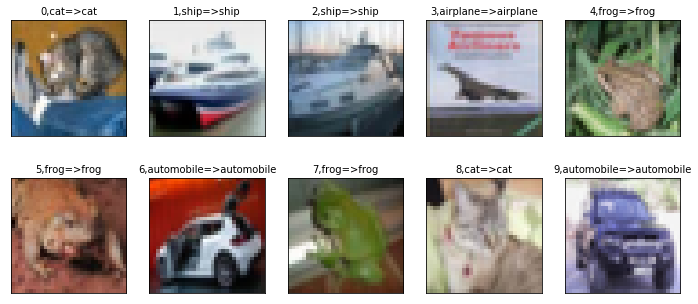

In [123]:
plot_images_labels_prediction(x_img_test, y_label_test, prediction, 0, 10)

In [172]:
Predicted_Probability = model.predict(x_img_test_normalize)

In [195]:
def show_Predicted_Probability(y, prediction,
                         x_img, Predicted_Probability, i):
    print("label:", label_dict[i][0],
         "predict:", label_dict[prediction[i]])
    plt.figure(figsize = (2, 2))
    plt.imshow(np.reshape(x_img_test[i], (32, 32, 3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+ "Probability:%1.9f" % (Predicted_Probability[i][j]))

label: c predict: airplane


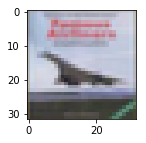

airplaneProbability:0.666337729
automobileProbability:0.001148124
birdProbability:0.030161437
catProbability:0.000544994
deerProbability:0.007774238
dogProbability:0.000034025
frogProbability:0.000042777
horseProbability:0.000061031
shipProbability:0.293551743
truckProbability:0.000343956


In [196]:
show_Predicted_Probability(y_label_test, prediction, x_img_test, Predicted_Probability, 3)

In [197]:
y_label_test.shape

(10000, 1)

In [199]:
prediction.shape

(10000,)

In [201]:
y_label_test.reshape(-1)

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0,
       4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6,
       0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2,
       1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7,
       8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7,
       4, 0, 6, 2, 1, 3, 0, 4, 2, 7, 8, 3, 1, 2, 8, 0, 8, 3, 5, 2, 4, 1,
       8, 9, 1, 2, 9, 7, 2, 9, 6, 5, 6, 3, 8, 7, 6, 2, 5, 2, 8, 9, 6, 0,
       0, 5, 2, 9, 5, 4, 2, 1, 6, 6, 8, 4, 8, 4, 5, 0, 9, 9, 9, 8, 9, 9,
       3, 7, 5, 0, 0, 5, 2, 2, 3, 8, 6, 3, 4, 0, 5, 8, 0, 1, 7, 2, 8, 8,
       7, 8, 5, 1, 8, 7, 1, 3, 0, 5, 7, 9, 7, 4, 5, 9, 8, 0, 7, 9, 8, 2,
       7, 6, 9, 4, 3, 9, 6, 4, 7, 6, 5, 1, 5, 8, 8, 0, 4, 0, 5, 5, 1, 1,
       8, 9, 0, 3, 1, 9, 2, 2, 5, 3, 9, 9, 4, 0, 3, 0, 0, 9, 8, 1, 5, 7,
       0, 8, 2, 4, 7, 0, 2, 3, 6, 3, 8, 5, 0, 3, 4, 3, 9, 0, 6, 1, 0, 9,
       1, 0, 7, 9, 1, 2, 6, 9, 3, 4, 6, 0, 0, 6, 6,

In [202]:
print(label_dict)
pd.crosstab(y_label_test.reshape(-1), prediction,
           rownames = ["label"], colnames = ["predict"])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,766,13,68,13,24,5,17,4,63,27
1,13,849,19,8,2,3,18,2,23,63
2,51,2,655,30,91,47,87,22,11,4
3,15,8,96,480,76,166,113,25,9,12
4,12,4,80,39,723,22,81,29,9,1
5,13,6,70,150,50,618,47,35,5,6
6,3,5,37,35,17,13,884,4,2,0
7,12,2,47,18,78,57,12,766,3,5
8,49,25,23,7,8,5,16,3,841,23


In [6]:
model = Sequential()

In [7]:
model.add(Conv2D(filters = 32,
                kernel_size = (3, 3), 
                input_shape = (32, 32, 3),
                activation = "relu",
                padding = "same"))
model.add(Dropout(0.3))
model.add(Conv2D(filters = 32,
                kernel_size = (3, 3), 
                activation = "relu",
                padding = "same"))
model.add(MaxPooling2D(pool_size = (2, 2)))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
model.add(Conv2D(filters = 64,
                kernel_size = (3, 3), 
                activation = "relu",
                padding = "same"))
model.add(Dropout(0.3))
model.add(Conv2D(filters = 64,
                kernel_size = (3, 3), 
                activation = "relu",
                padding = "same"))
model.add(MaxPooling2D(pool_size = (2, 2)))

In [9]:
model.add(Conv2D(filters = 128,
                kernel_size = (3, 3), 
                activation = "relu",
                padding = "same"))
model.add(Dropout(0.3))
model.add(Conv2D(filters = 128,
                kernel_size = (3, 3), 
                activation = "relu",
                padding = "same"))
model.add(MaxPooling2D(pool_size = (2, 2)))

In [10]:
model.add(Flatten())
model.add(Dropout(rate = 0.3))
model.add(Dense(2500, activation = "relu"))
model.add(Dropout(rate = 0.3))
model.add(Dense(1500, activation = "relu"))
model.add(Dropout(rate = 0.3))
model.add(Dense(10, activation = "softmax"))

In [11]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", 
             metrics = ["accuracy"])

In [209]:
train_history = model.fit(x = x_img_train_normalize,y = y_label_train_OneHot,
                         validation_split = 0.2,
                         epochs = 50, batch_size = 300, verbose = 1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 90691s 2s/step - loss: 1.8951 - acc: 0.2920 - val_loss: 1.6609 - val_acc: 0.3953
Epoch 2/50
40000/40000 [==============================] - 209s 5ms/step - loss: 1.4590 - acc: 0.4607 - val_loss: 1.4128 - val_acc: 0.5034
Epoch 3/50
40000/40000 [==============================] - 210s 5ms/step - loss: 1.2543 - acc: 0.5470 - val_loss: 1.1402 - val_acc: 0.5894
Epoch 4/50
40000/40000 [==============================] - 221s 6ms/step - loss: 1.1115 - acc: 0.6013 - val_loss: 1.0204 - val_acc: 0.6421
Epoch 5/50
40000/40000 [==============================] - 221s 6ms/step - loss: 0.9969 - acc: 0.6439 - val_loss: 0.9220 - val_acc: 0.6754
Epoch 6/50
40000/40000 [==============================] - 221s 6ms/step - loss: 0.9157 - acc: 0.6746 - val_loss: 0.9079 - val_acc: 0.6901
Epoch 7/50
40000/40000 [==============================] - 223s 6ms/step - loss: 0.8397 - acc: 0.6998 - val_loss: 0.8813 -

In [31]:
train_history = model.fit(x = x_img_train_normalize,y = y_label_train_OneHot,
                         validation_split = 0.2,
                         epochs = 5, batch_size = 128, verbose = 1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 243s 6ms/step - loss: 0.8628 - acc: 0.6953 - val_loss: 0.8078 - val_acc: 0.7120
Epoch 2/5
40000/40000 [==============================] - 248s 6ms/step - loss: 0.7949 - acc: 0.7208 - val_loss: 0.7796 - val_acc: 0.7279
Epoch 3/5
40000/40000 [==============================] - 252s 6ms/step - loss: 0.7459 - acc: 0.7348 - val_loss: 0.7458 - val_acc: 0.7389
Epoch 4/5
40000/40000 [==============================] - 238s 6ms/step - loss: 0.6932 - acc: 0.7520 - val_loss: 0.7043 - val_acc: 0.7561
Epoch 5/5
40000/40000 [==============================] - 225s 6ms/step - loss: 0.6639 - acc: 0.7631 - val_loss: 0.7529 - val_acc: 0.7391


In [30]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("loading successful")
except:
    print("loading fail")

loading successful


In [28]:
# create a savemodel file
import os
os.mkdir("SaveModel")

In [29]:

model.save_weights('SaveModel/cifarCnnModel.h5')
print("Saved model to disk")

Saved model to disk
